# RQ1: Analysing the Impact of Individual Factors on PR Acceptance

## Imports & Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from utils import percent_meeting_condition, conditional_acceptance_rate, df_column_statistics, chi_squared_test

pr_df = pd.read_csv('data/filtered/pull_request.csv')
related_issue_df = pd.read_csv('data/filtered/related_issue.csv')

print("Shape:", pr_df.shape)

Shape: (7156, 38)


In [2]:
pr_df['repo_id'].unique().shape

(1054,)

## Time to Closure

In [3]:
df_column_statistics(pr_df, 'days_to_close')

Accepted PR Statistics for 'days_to_close':
Mean = 3.006649204110417
Median = 1.0
Standard Deviation = 5.940535313404627
Min = 1.0
Max = 68.0

Rejected PR Statistics for 'days_to_close':
Mean = 6.89420884632923
Median = 2.0
Standard Deviation = 11.115630156810978
Min = 1.0
Max = 148.0


## Related Issues

In [4]:
percent_meeting_condition(pr_df, 'related_issue')

Percentage of PRs with related_issue: 31.93% (2285/7156)


In [5]:
conditional_acceptance_rate(pr_df, 'related_issue')

Acceptance rate for PRs with related_issue: 64.9015317286652 (1483/2285)
Acceptance rate for PRs without related_issue: 71.44323547526176 (3480/4871)


In [6]:
chi_squared_test(pr_df, 'related_issue')

Chi-squared Test for 'related_issue' vs 'accepted'

Contingency Table:
accepted       False  True 
related_issue              
False           1391   3480
True             802   1483

Chi-squared statistic: 31.0095
P-value: 0.000000025676976
Degrees of freedom: 1
N: 7156
Cramér's V: 0.0658
Summary: $\chi^2$ = 31.01, $p$ < 0.001, Cramér's V = 0.066


### Open vs. Closed Related Issues

In [7]:
pr_with_multiple_issues = related_issue_df.groupby('pr_id').size()
print(f"Number of PRs with multiple related issues: {len(pr_with_multiple_issues[pr_with_multiple_issues > 1])}")

Number of PRs with multiple related issues: 10


In [8]:
conditional_acceptance_rate(pr_df[pr_df['related_issue']], 'has_open_related_issue')

Acceptance rate for PRs with has_open_related_issue: 4.57516339869281 (14/306)
Acceptance rate for PRs without has_open_related_issue: 74.22940879231935 (1469/1979)


## Reviews

In [9]:
percent_meeting_condition(pr_df, 'has_review')

Percentage of PRs with has_review: 66.34% (4747/7156)


In [10]:
conditional_acceptance_rate(pr_df, 'has_review')

Acceptance rate for PRs with has_review: 81.79903096692648 (3883/4747)
Acceptance rate for PRs without has_review: 44.831880448318806 (1080/2409)


In [11]:
chi_squared_test(pr_df, 'has_review')

Chi-squared Test for 'has_review' vs 'accepted'

Contingency Table:
accepted    False  True 
has_review              
False        1329   1080
True          864   3883

Chi-squared statistic: 1025.7462
P-value: 0.000000000000000
Degrees of freedom: 1
N: 7156
Cramér's V: 0.3786
Summary: $\chi^2$ = 1025.75, $p$ < 0.001, Cramér's V = 0.379


In [12]:
filtered_df = pr_df[pr_df['num_reviews'] > 0]
print("Summary statistics for PRs with at least one review:")
df_column_statistics(filtered_df, 'num_reviews')

Summary statistics for PRs with at least one review:
Accepted PR Statistics for 'num_reviews':
Mean = 3.793716198815349
Median = 2.0
Standard Deviation = 5.035366080021163
Min = 1
Max = 30

Rejected PR Statistics for 'num_reviews':
Mean = 3.4895833333333335
Median = 2.0
Standard Deviation = 4.710372451587742
Min = 1
Max = 30


## Comments

In [13]:
percent_meeting_condition(pr_df, 'has_comment')

Percentage of PRs with has_comment: 85.63% (6128/7156)


In [14]:
conditional_acceptance_rate(pr_df, 'has_comment')

Acceptance rate for PRs with has_comment: 65.87793733681463 (4037/6128)
Acceptance rate for PRs without has_comment: 90.07782101167315 (926/1028)


In [15]:
chi_squared_test(pr_df, 'has_comment')

Chi-squared Test for 'has_comment' vs 'accepted'

Contingency Table:
accepted     False  True 
has_comment              
False          102    926
True          2091   4037

Chi-squared statistic: 241.4265
P-value: 0.000000000000000
Degrees of freedom: 1
N: 7156
Cramér's V: 0.1837
Summary: $\chi^2$ = 241.43, $p$ < 0.001, Cramér's V = 0.184


In [16]:
print("Summary statistics for PRs with at least one comment:")
df_column_statistics(pr_df[pr_df['num_comments'] > 0], 'num_comments')

Summary statistics for PRs with at least one comment:
Accepted PR Statistics for 'num_comments':
Mean = 3.494921971761209
Median = 3.0
Standard Deviation = 3.419799876360614
Min = 1
Max = 30

Rejected PR Statistics for 'num_comments':
Mean = 3.411764705882353
Median = 3.0
Standard Deviation = 2.978910769452718
Min = 1
Max = 30


In [17]:
# Create 2x2 cross-tabulation: Review Presence × Comment Presence
crosstab_data = []

for has_review in [False, True]:
    for has_comment in [False, True]:
        filtered = pr_df[(pr_df['has_review'] == has_review) & 
                        (pr_df['has_comment'] == has_comment)]
        
        count = len(filtered)
        accepted = filtered['accepted'].sum()
        acceptance_rate = (accepted / count * 100) if count > 0 else 0
        
        crosstab_data.append({
            'Has Review': has_review,
            'Has Comment': has_comment,
            'Count': count,
            'Accepted': accepted,
            'Acceptance Rate (%)': round(acceptance_rate, 2)
        })

crosstab_df = pd.DataFrame(crosstab_data)

# Pivot for better visualization
pivot_table = crosstab_df.pivot_table(
    values='Acceptance Rate (%)',
    index='Has Review',
    columns='Has Comment',
    aggfunc='first'
)

print("2x2 Cross-Tabulation: Review × Comment Effect on Acceptance Rate\n")
print(pivot_table)
print("\n" + "="*60 + "\n")

# Show detailed counts
print("Detailed Breakdown:\n")
print(crosstab_df.to_string(index=False))

2x2 Cross-Tabulation: Review × Comment Effect on Acceptance Rate

Has Comment  False  True 
Has Review               
False         0.00  44.83
True         90.08  79.51


Detailed Breakdown:

 Has Review  Has Comment  Count  Accepted  Acceptance Rate (%)
      False        False      0         0                 0.00
      False         True   2409      1080                44.83
       True        False   1028       926                90.08
       True         True   3719      2957                79.51


## Commits

In [18]:
df_column_statistics(pr_df, 'num_commits')

Accepted PR Statistics for 'num_commits':
Mean = 4.6566592786621
Median = 3.0
Standard Deviation = 5.222169037674787
Min = 1
Max = 30

Rejected PR Statistics for 'num_commits':
Mean = 4.362973096215231
Median = 3.0
Standard Deviation = 5.0632438813394955
Min = 0
Max = 30


## Files Changed

In [19]:
df_column_statistics(pr_df, 'num_files_changed')

Accepted PR Statistics for 'num_files_changed':
Mean = 24.99818658069716
Median = 4.0
Standard Deviation = 70.83699374141655
Min = 1.0
Max = 1484.0

Rejected PR Statistics for 'num_files_changed':
Mean = 23.489244851258583
Median = 4.0
Standard Deviation = 70.8000072343478
Min = 0.0
Max = 965.0


## Overall Final Plot

Days to Close - 90% coverage at threshold 10 with acceptance rate 71.69%
Days to Close - 95% coverage at threshold 18 with acceptance rate 70.44%
Num. Reviews - 90% coverage at threshold 9 with acceptance rate 81.67%
Num. Reviews - 95% coverage at threshold 13 with acceptance rate 81.77%
Num. Comments - 90% coverage at threshold 7 with acceptance rate 65.53%
Num. Comments - 95% coverage at threshold 9 with acceptance rate 65.68%
Num. Commits - 90% coverage at threshold 10 with acceptance rate 69.03%
Num. Commits - 95% coverage at threshold 15 with acceptance rate 69.30%


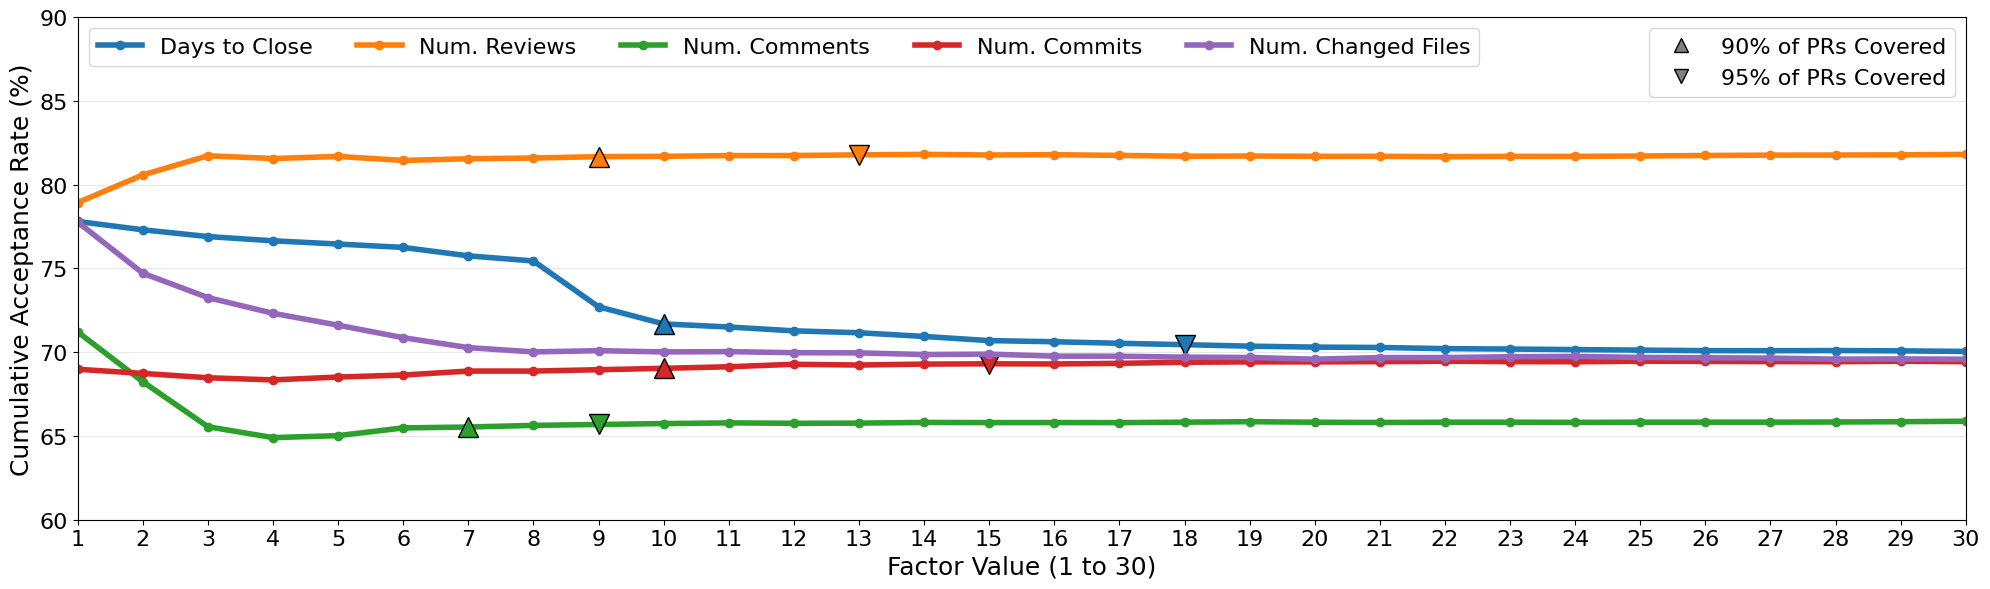

In [20]:
# Factors to plot
factors = {
    'Days to Close': 'days_to_close',
    'Num. Reviews': 'num_reviews',
    'Num. Comments': 'num_comments',
    'Num. Commits': 'num_commits',
    'Num. Changed Files': 'num_files_changed'
}

# Define colors for each factor
colors = {
    'Days to Close': '#1f77b4',
    'Num. Reviews': '#ff7f0e',
    'Num. Comments': '#2ca02c',
    'Num. Commits': '#d62728',
    'Num. Changed Files': '#9467bd'
}

fig, ax = plt.subplots(figsize=(20, 6))

top_n = 31

for label, column in factors.items():
    cumulative_rates = []
    
    for threshold in range(1, top_n):
        # Filter PRs with factor value <= threshold
        filtered_df = pr_df[pr_df[column] <= threshold]
        # Drop PRs with factor value of 0 to avoid skewing
        filtered_df = filtered_df[filtered_df[column] > 0]
        
        if len(filtered_df) > 0:
            acceptance_rate = (filtered_df['accepted']).sum() / len(filtered_df) * 100
            cumulative_rates.append(acceptance_rate)
        else:
            cumulative_rates.append(0)
    
    # Plot line
    ax.plot(range(1, top_n), cumulative_rates, marker='o', markersize=6, linewidth=4, label=label, color=colors[label])
    
    # Calculate 90% and 95% coverage points
    total_count = len(pr_df[pr_df[column] > 0])
    
    # Find x-axis value for 90% coverage
    for threshold in range(1, top_n):
        coverage = len(pr_df[(pr_df[column] <= threshold) & (pr_df[column] > 0)]) / total_count
        if coverage >= 0.90:
            y_value_90 = cumulative_rates[threshold - 1]
            print(f"{label} - 90% coverage at threshold {threshold} with acceptance rate {y_value_90:.2f}%")
            ax.plot(threshold, y_value_90, marker='^', markersize=14, color=colors[label], markeredgecolor='black', markeredgewidth=1)
            break
    
    # Find x-axis value for 95% coverage
    for threshold in range(1, top_n):
        coverage = len(pr_df[(pr_df[column] <= threshold) & (pr_df[column] > 0)]) / total_count
        if coverage >= 0.95:
            y_value_95 = cumulative_rates[threshold - 1]
            print(f"{label} - 95% coverage at threshold {threshold} with acceptance rate {y_value_95:.2f}%")
            ax.plot(threshold, y_value_95, marker='v', markersize=14, color=colors[label], markeredgecolor='black', markeredgewidth=1)
            break

ax.set_xlabel('Factor Value (1 to 30)', fontsize=18)
ax.set_ylabel('Cumulative Acceptance Rate (%)', fontsize=18)
ax.grid(True, alpha=0.3, axis='y')
ax.set_xlim(1, 30)
ax.set_ylim(60, 90)
ax.set_xticks(range(1, top_n))
ax.tick_params(axis='both', labelsize=16)

handles, labels = ax.get_legend_handles_labels()
factor_legend = ax.legend(handles, labels, ncol=5, loc='upper left', fontsize=16)

from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='^', color='gray', markerfacecolor='gray', 
           markersize=10, linestyle='None', markeredgecolor='black', 
           markeredgewidth=1, label='90% of PRs Covered'),
    Line2D([0], [0], marker='v', color='gray', markerfacecolor='gray', 
           markersize=10, linestyle='None', markeredgecolor='black', 
           markeredgewidth=1, label='95% of PRs Covered')
]
coverage_legend = ax.legend(handles=legend_elements, loc='upper right', fontsize=16)

ax.add_artist(factor_legend)

plt.tight_layout()
plt.show()